Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def exercise_0(file):
    return pd.read_csv(file)

def exercise_1(df):
    return list(df)

def exercise_2(df, k):
    return df.head(k)

def exercise_3(df, k):
    return df.sample(n=k)

def exercise_4(df):
    return df['type'].unique()

def exercise_5(df):
    return df['nameDest'].value_counts().head(10)

def exercise_6(df):
    return df[df['isFraud'] == 1]

def exercise_7(df):
    df1 = df.groupby('nameOrig')['nameDest'].agg(['nunique'])
    df1.sort_values(by=('nunique'), ascending=False, inplace=True)
    return df1

Use the empty cell to test the exercises. If you modify the original `df`, rerun the provided cell.

In [2]:
df = exercise_0('transactions.csv')

In [3]:
# Test exercises here
exercise_1(df)
exercise_2(df, 5)
exercise_3(df, 5)
exercise_4(df)
exercise_5(df)
exercise_6(df)
print(exercise_7(df))
print('done!')

             nunique
nameOrig            
C745009740         2
C260230637         2
C44568807          2
C1709295811        2
C361604284         1
...              ...
C1648185402        1
C1648194899        1
C1648216508        1
C1648222711        1
C999983894         1

[199996 rows x 1 columns]
done!


Create graphs for the following. 
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes
 
The function plot the graph and then return a string containing a short description explaining the relevance of the chart.



'While the transaction frequencies depend on the whims of the available data, what is interesting here is that fraudulent activity is only seen on CASH_OUT and TRANSFER transactions. This insight inform management to focus the effort of manual reviews which could result in less fraud being missed.'

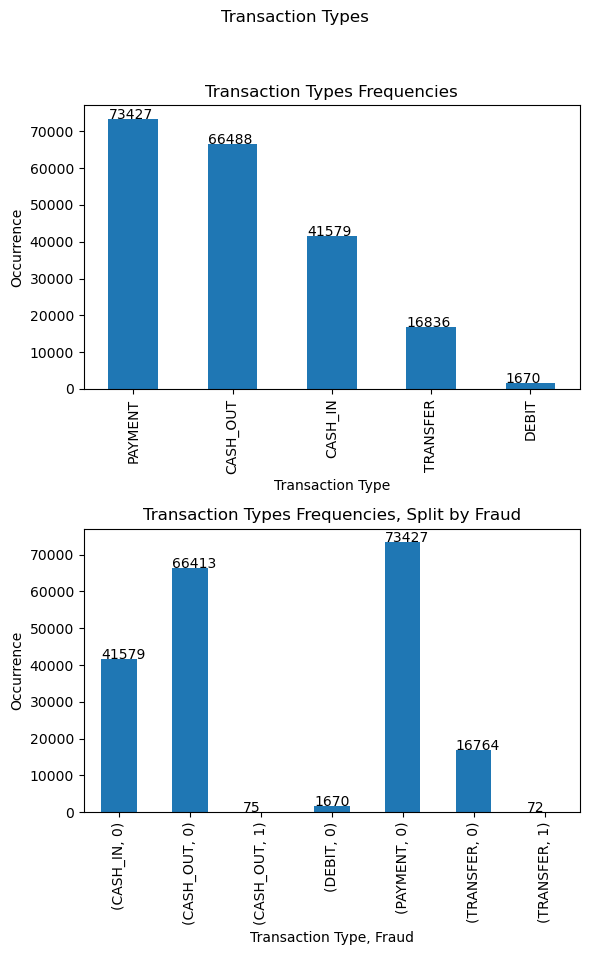

In [4]:
def visual_1(df):
    def transaction_counts(df):
        return df['type'].value_counts()
    def transaction_counts_split_by_fraud(df):
        return df.groupby(by=['type', 'isFraud']).size()

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Transaction Types Frequencies')
    axs[0].set_xlabel('Transaction Type')
    axs[0].set_ylabel('Occurrence')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Transaction Types Frequencies, Split by Fraud')
    axs[1].set_xlabel('Transaction Type, Fraud')
    axs[1].set_ylabel('Occurrence')
    fig.suptitle('Transaction Types')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return 'While the transaction frequencies depend on the whims of the ' \
           'available data, what is interesting here is that fraudulent ' \
           'activity is only seen on CASH_OUT and TRANSFER transactions. '\
           'This insight inform management to focus the effort of manual '\
           'reviews which could result in less fraud being missed.'

visual_1(df)


'A cash out occurs when a partipant withdraws money. It is reassuring that only two of the four quadrants have activity, as the contrarywould indicate something wrong with the dataset. The y=-x line isparticularly interesting as it indicates instant settlement.'

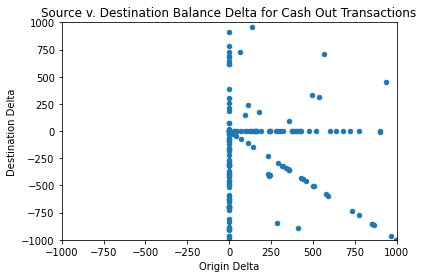

In [ ]:
def visual_2(df):
    def query(df):
        df['Origin Delta'] = df['oldbalanceOrg'] -	df['newbalanceOrig']
        df['Destination Delta'] = df['oldbalanceDest'] -	df['newbalanceDest']
        return df[df['type']=='CASH_OUT']
    plot = query(df).plot.scatter(x='Origin Delta',y='Destination Delta')
    plot.set_title('Source v. Destination Balance Delta for Cash Out Transactions')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return 'A cash out occurs when a partipant withdraws money. It is reassuring '\
           'that only two of the four quadrants have activity, as the contrary '\
           'would indicate something wrong with the dataset. The y=-x line is '\
           'particularly interesting as it indicates instant settlement.'

visual_2(df)


Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query.

'Here we see that the fraud detection at play misses almost all of the fradulent activity. However, there are no false negatives either. One interpretation could be that the detector does not report until it has a high degree of confidence.'

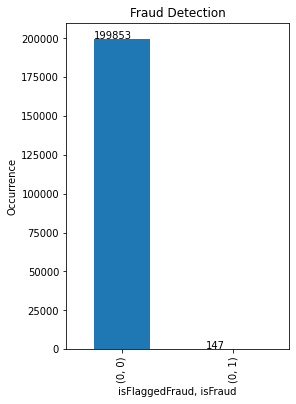

In [ ]:
def exercise_custom(df):
    return df[['isFlaggedFraud', 'isFraud']].value_counts()
    
def visual_custom(df):
    fig, ax = plt.subplots(1, figsize=(4,6))
    exercise_custom(df).plot(ax=ax, kind='bar')
    ax.set_title('Fraud Detection')
    ax.set_xlabel('isFlaggedFraud, isFraud')
    ax.set_ylabel('Occurrence')
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()))

    return "Here we see that the fraud detection at play misses almost all "\
           "of the fradulent activity. However, there are no false negatives "\
           "either. One interpretation could be that the detector does not "\
           "report until it has a high degree of confidence."

visual_custom(df)


All done! Your work will be instrumental for our team's continued success.